In [2]:
#importing the packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import spacy
from collections import Counter
#import en_core_web_sm\
import re
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import langdetect
from langdetect import detect
import detectlanguage
from google_trans_new import google_translator  
import langid
import googletrans

In [22]:
#loading full sample of the formal text data
full_formal=pd.read_excel("full_formal.xlsx")

In [24]:
#showing the first few observations
full_formal.head()

,Unnamed: 0,0,l
0,0,Reprise de la session,fr
1,1,Je déclare reprise la session du Parlement eur...,fr
2,2,"Comme vous avez pu le constater, le grand ""bog...",fr
3,3,Vous avez souhaité un débat à ce sujet dans le...,fr
4,4,"En attendant, je souhaiterais, comme un certai...",fr


In [25]:
#renaming the columns
full_formal.rename(
    columns=({ 0: 'txt', 'l': 'lang'}), 
    inplace=True,
)

In [8]:
#loading short sample of formal data and renaming it
formal=pd.read_excel('formal_3.xlsx')
formal.rename(
    columns=({ 0: 'txt', 'l': 'lang'}), 
    inplace=True,
)
formal.head()

,Unnamed: 0,txt,lang
0,0,Reprise de la,fr
1,1,Je déclare reprise,fr
2,2,Comme vous avez,fr
3,3,Vous avez souhaité,fr
4,4,"En attendant, je",fr


In [5]:
#loading the short sample of the data
short=pd.read_excel('short.xlsx')

In [6]:
short['review_body']=short['review_body'].apply(lambda item: ' '.join(item.split()[:3]))
short.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,fr_0424335,product_fr_0297678,reviewer_fr_0961886,1,A déconseiller -,Brumisateur à pompe,fr,beauty
1,1,fr_0452615,product_fr_0613288,reviewer_fr_0857499,1,Si vous voulez,Insatisfaisant,fr,baby_product
2,2,fr_0407673,product_fr_0571250,reviewer_fr_0383240,1,Écran de mauvaise,Ne recommande pas,fr,pc
3,3,fr_0579191,product_fr_0030168,reviewer_fr_0729693,1,Cet engin ne,A éviter!,fr,musical_instruments
4,4,fr_0931533,product_fr_0468261,reviewer_fr_0734066,1,Très beau produit,Déçue,fr,toy


In [2]:
#loading the preprocessed and claen data
common_df=pd.read_excel('common_df_clean.xlsx')

In [3]:
#resetting the index of the data frame
common_df.reset_index(drop=True, inplace=True)

In [6]:
#customized vectorizer for 10,000 features
from sklearn.pipeline import Pipeline
tvec = TfidfVectorizer(stop_words=None,token_pattern='(?u)\\b\\w\\w*\\b|„|¿|¡', max_features=10000, ngram_range=(1, 3))

In [4]:
#creating logistic regression pipeline with 10,000 of features
from sklearn.pipeline import Pipeline
lr = LogisticRegression()
original_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', lr)
])


In [5]:
#creating the function to print out the results of the modeling and predictions
def lr_cv(splits, X, Y, pipeline, average_method, testing):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        scores = lr_fit.score(X[test],Y[test])
        model_result=lr_fit.predict(testing)
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              de          en          es       fr')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*56)

    print("accuracy: %.3f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.3f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.3f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.3f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))
    return(model_result)

In [8]:
%%time
#checking the performance of the logistic regression model and testing it on a short sample
lr_cv(5, common_df.new, common_df.language, original_pipeline,'macro', short.review_body)

              de          en          es       fr
precision: [0.99995118 0.99978047 0.9987331  0.99985358]
recall:    [0.99921944 0.99978047 0.99992682 0.99939018]
f1 score:  [0.99958517 0.99978047 0.9993296  0.99962183]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99995118 0.99970732 0.99865997 0.99987797]
recall:    [0.99919504 0.99980486 0.99982925 0.99936579]
f1 score:  [0.99957297 0.99975609 0.99924427 0.99962182]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99992677 0.99970735 0.99900083 0.99987799]
recall:    [0.99917065 0.99990243 0.99992682 0.99951215]
f1 score:  [0.99954857 0.99980488 0.99946361 0.99969504]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99997559 0.99980487 0.99892788 0.99995119]
recall:    [0.99939018 0.99985364 1.         0.99941456]
f1

array(['es', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype=object)

In [7]:
#pipeline for Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
bayes_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', clf)
])

In [10]:
%%time
#checking the results and predictions of Multinomial Naive Bayes for the short text
lr_cv(5, common_df.new, common_df.language, bayes_pipeline,'macro',short.review_body)

              de          en          es       fr
precision: [0.99897636 0.99970735 0.99997559 0.99992678]
recall:    [0.99980486 0.99990243 0.99946336 0.99941458]
f1 score:  [0.99939044 0.99980488 0.99971941 0.99967062]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99870861 0.99980487 0.99997559 0.99992678]
recall:    [0.99980486 0.99985364 0.9993414  0.99941458]
f1 score:  [0.99925643 0.99982926 0.99965839 0.99967062]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99878156 0.99973173 1.         0.99990239]
recall:    [0.99975607 0.99990243 0.99924383 0.99951215]
f1 score:  [0.99926858 0.99981707 0.99962177 0.99970723]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99887914 0.99990242 1.         0.99990238]
recall:    [0.99995121 0.99985364 0.99941458 0.99946335]
f1

array(['de', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'es',
       'es', 'de', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype='<U2')

In [9]:
%%time
#checking the results and predictions of Multinomial Naive Bayes for the formal text
lr_cv(5, common_df.new, common_df.language, bayes_pipeline,'macro',formal.txt)

              de          en          es       fr
precision: [0.99897636 0.99970735 0.99997559 0.99992678]
recall:    [0.99980486 0.99990243 0.99946336 0.99941458]
f1 score:  [0.99939044 0.99980488 0.99971941 0.99967062]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99870861 0.99980487 0.99997559 0.99992678]
recall:    [0.99980486 0.99985364 0.9993414  0.99941458]
f1 score:  [0.99925643 0.99982926 0.99965839 0.99967062]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99878156 0.99973173 1.         0.99990239]
recall:    [0.99975607 0.99990243 0.99924383 0.99951215]
f1 score:  [0.99926858 0.99981707 0.99962177 0.99970723]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99887914 0.99990242 1.         0.99990238]
recall:    [0.99995121 0.99985364 0.99941458 0.99946335]
f1

array(['de', 'fr', 'fr', 'fr', 'fr', 'fr', 'de', 'de', 'fr', 'fr', 'fr',
       'fr', 'fr', 'de', 'fr', 'fr', 'de', 'fr', 'fr', 'fr', 'de', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'de', 'en', 'en', 'en', 'en', 'en', 'de', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype='<U2')

100,000 FEATURES

In [10]:
#custom vectorizer for 100,000 features
tvec_up = TfidfVectorizer(stop_words=None,token_pattern='(?u)\\b\\w\\w*\\b|„|¿|¡', max_features=100000, ngram_range=(1, 3))

In [11]:
#pipeline for Multinomial Naive Bayes with 100,000 features
clf = MultinomialNB()
bayes_pipeline_up = Pipeline([
    ('vectorizer', tvec_up),
    ('classifier', clf)
])

In [26]:
%%time
#testing the performance and predictions for the full formal text
lr_cv(5, common_df.new, common_df.language, bayes_pipeline_up,'macro',full_formal.txt)

              de          en          es       fr
precision: [0.99980486 0.99975612 0.99995121 0.99995121]
recall:    [0.99982925 0.99992682 0.99992682 0.99978047]
f1 score:  [0.99981706 0.99984146 0.99993902 0.99986583]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99980487 0.99982927 1.         0.99997561]
recall:    [0.99985364 0.99995121 0.99987804 0.99992682]
f1 score:  [0.99982926 0.99989024 0.99993901 0.99995121]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99980486 0.99978051 1.         0.9999756 ]
recall:    [0.99982925 1.         0.99985364 0.99987804]
f1 score:  [0.99981706 0.99989025 0.99992682 0.99992682]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99982927 0.99987805 1.         0.9999756 ]
recall:    [0.99995121 0.99997561 0.99987804 0.99987803]
f1

array(['fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype='<U2')

In [12]:
%%time
#testing the performance and predictions for the short formal text
lr_cv(5, common_df.new, common_df.language, bayes_pipeline_up,'macro',formal.txt)

              de          en          es       fr
precision: [0.99980486 0.99975612 0.99995121 0.99995121]
recall:    [0.99982925 0.99992682 0.99992682 0.99978047]
f1 score:  [0.99981706 0.99984146 0.99993902 0.99986583]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99980487 0.99982927 1.         0.99997561]
recall:    [0.99985364 0.99995121 0.99987804 0.99992682]
f1 score:  [0.99982926 0.99989024 0.99993901 0.99995121]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99980486 0.99978051 1.         0.9999756 ]
recall:    [0.99982925 1.         0.99985364 0.99987804]
f1 score:  [0.99981706 0.99989025 0.99992682 0.99992682]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99982927 0.99987805 1.         0.9999756 ]
recall:    [0.99995121 0.99997561 0.99987804 0.99987803]
f1

array(['fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'de', 'fr', 'fr', 'fr', 'de', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'de', 'en', 'en', 'en', 'en', 'en', 'de', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype='<U2')

In [13]:
%%time
#testing the performance and predictions for the short informal text
lr_cv(5, common_df.new, common_df.language, bayes_pipeline_up,'macro',short.review_body)

              de          en          es       fr
precision: [0.99980486 0.99975612 0.99995121 0.99995121]
recall:    [0.99982925 0.99992682 0.99992682 0.99978047]
f1 score:  [0.99981706 0.99984146 0.99993902 0.99986583]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99980487 0.99982927 1.         0.99997561]
recall:    [0.99985364 0.99995121 0.99987804 0.99992682]
f1 score:  [0.99982926 0.99989024 0.99993901 0.99995121]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99980486 0.99978051 1.         0.9999756 ]
recall:    [0.99982925 1.         0.99985364 0.99987804]
f1 score:  [0.99981706 0.99989025 0.99992682 0.99992682]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99982927 0.99987805 1.         0.9999756 ]
recall:    [0.99995121 0.99997561 0.99987804 0.99987803]
f1

array(['fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype='<U2')

1,000,000 FEATURES

In [13]:
#custom vectorizer for 1,000,000 features
tvec_up_more = TfidfVectorizer(token_pattern='(?u)\\b\\w\\w*\\b|„|¿|¡', max_features=1000000, ngram_range=(1, 3))

In [14]:
#pipeline for 1,000,000 features
clf = MultinomialNB()
bayes_pipeline_up_more = Pipeline([
    ('vectorizer', tvec_up_more),
    ('classifier', clf)
])

In [28]:
%%time
#testing the performance and predictions for the full formal text
lr_cv(5, common_df.new, common_df.language, bayes_pipeline_up_more,'macro',full_formal.txt)

              de          en          es       fr
precision: [1.         0.99982927 0.99997561 0.99995122]
recall:    [0.99985364 0.99995121 0.99997561 0.99997561]
f1 score:  [0.99992682 0.99989024 0.99997561 0.99996341]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99992682 0.99987805 1.         1.        ]
recall:    [0.99990243 0.99995121 1.         0.99995121]
f1 score:  [0.99991462 0.99991463 1.         0.99997561]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99990242 0.99985367 1.         0.99997561]
recall:    [0.99985364 1.         0.99995121 0.99992682]
f1 score:  [0.99987803 0.99992683 0.99997561 0.99995121]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99987805 0.99992683 1.         1.        ]
recall:    [0.99995121 0.99997561 0.99992682 0.99995121]
f1

array(['fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype='<U2')

In [15]:
%%time
#testing the performance and predictions for the short formal text
lr_cv(5, common_df.new, common_df.language, bayes_pipeline_up_more,'macro',formal.txt)

              de          en          es       fr
precision: [1.         0.99982927 0.99997561 0.99995122]
recall:    [0.99985364 0.99995121 0.99997561 0.99997561]
f1 score:  [0.99992682 0.99989024 0.99997561 0.99996341]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99992682 0.99987805 1.         1.        ]
recall:    [0.99990243 0.99995121 1.         0.99995121]
f1 score:  [0.99991462 0.99991463 1.         0.99997561]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99990242 0.99985367 1.         0.99997561]
recall:    [0.99985364 1.         0.99995121 0.99992682]
f1 score:  [0.99987803 0.99992683 0.99997561 0.99995121]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99987805 0.99992683 1.         1.        ]
recall:    [0.99995121 0.99997561 0.99992682 0.99995121]
f1

array(['fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype='<U2')

In [16]:
%%time
#testing the performance and predictions for the short text
lr_cv(5, common_df.new, common_df.language, bayes_pipeline_up_more,'macro',short.review_body)

              de          en          es       fr
precision: [1.         0.99982927 0.99997561 0.99995122]
recall:    [0.99985364 0.99995121 0.99997561 0.99997561]
f1 score:  [0.99992682 0.99989024 0.99997561 0.99996341]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99992682 0.99987805 1.         1.        ]
recall:    [0.99990243 0.99995121 1.         0.99995121]
f1 score:  [0.99991462 0.99991463 1.         0.99997561]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99990242 0.99985367 1.         0.99997561]
recall:    [0.99985364 1.         0.99995121 0.99992682]
f1 score:  [0.99987803 0.99992683 0.99997561 0.99995121]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99987805 0.99992683 1.         1.        ]
recall:    [0.99995121 0.99997561 0.99992682 0.99995121]
f1

array(['fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype='<U2')

Random Forest

In [19]:
#a pipeline for Random Forest with 10,000
rf = RandomForestClassifier()
rf_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', rf)
])


In [21]:
%%time
#testing the performance and predictions for the short text
lr_cv(5, common_df.new, common_df.language, rf_pipeline,'macro',short.review_body)

              de          en          es       fr
precision: [0.99987792 0.99973161 0.99759048 0.99978025]
recall:    [0.99890233 0.99946336 0.99980486 0.99880476]
f1 score:  [0.99938989 0.99959747 0.99869644 0.99929227]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99990232 0.99975597 0.99737188 0.99968262]
recall:    [0.99882915 0.99931701 0.99975607 0.99880476]
f1 score:  [0.99936545 0.99953644 0.99856255 0.9992435 ]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99982911 0.99963407 0.99788161 0.99973145]
recall:    [0.9989999  0.99953654 0.9996585  0.99887794]
f1 score:  [0.99941433 0.99958531 0.99876927 0.99930451]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99990236 0.99970717 0.99776058 0.99985349]
recall:    [0.99921944 0.99929261 0.99985364 0.99885352]
f1

array(['es', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'en',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype=object)

In [68]:
%%time
#Support Vector Machines (ovo) Pipeline  with predictions for short text
from sklearn import svm
svm = svm.SVC(decision_function_shape='ovo')
svm_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', svm)
])
lr_cv(5, common_df.new, common_df.language, svm_pipeline,'macro', short.review_body)

              de          en          es       fr
precision: [0.99990236 0.99975609 0.99878174 0.99987798]
recall:    [0.99919504 0.99982925 0.99990243 0.99939018]
f1 score:  [0.99954858 0.99979267 0.99934177 0.99963402]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99982914 0.99975609 0.99870864 0.99990238]
recall:    [0.99919504 0.99980486 0.99982925 0.99936579]
f1 score:  [0.99951199 0.99978047 0.99926863 0.99963401]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99987796 0.99973173 0.99900078 0.99990239]
recall:    [0.99924383 0.99992682 0.99987804 0.99946336]
f1 score:  [0.99956079 0.99982927 0.99943922 0.99968283]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99990238 0.99987804 0.9989034  0.99990237]
recall:    [0.99943897 0.99992682 0.99987804 0.99934138]
f1

array(['es', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype=object)

In [67]:
%%time
#Support Vector Machines (ovr) Pipeline with predictions for short text
svc = OneVsRestClassifier(SVC())
svc_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', svc)])
lr_cv(5, common_df.new, common_df.language, svc_pipeline,'macro', short.review_body)

              de          en          es       fr
precision: [0.99992677 0.99824668 0.99990239 0.99995119]
recall:    [0.99921944 0.99992682 0.99946336 0.99941458]
f1 score:  [0.99957298 0.99908605 0.99968283 0.99968281]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99995118 0.99812524 0.99990237 0.99995119]
recall:    [0.99921944 0.99997561 0.9993414  0.99939018]
f1 score:  [0.99958517 0.99904957 0.99962181 0.99967061]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99878159 0.99975612 0.99997559 0.99992679]
recall:    [0.99978047 0.99995121 0.99921944 0.99948775]
f1 score:  [0.99928078 0.99985366 0.99959737 0.99970722]
--------------------------------------------------------
              de          en          es       fr
precision: [0.99995119 0.99844131 0.99987797 0.99992678]
recall:    [0.99946336 1.         0.99936579 0.99936578]
f1

array(['en', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'es', 'en',
       'es', 'en', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'es', 'es', 'en', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype='<U2')

TESTING EXISTING LANGUAGE IDENTIFICATION TOOLS ON SHORT, FORMAL AND SGORT FORMAL SAMPLES

In [33]:
#adding the results of LangDetect tool to the dataframe for short samples
short['Languagereveiw'] = short['review_body'].apply(detect)

In [36]:
short['Languagereveiw'].values.tolist()

['fr',
 'cs',
 'fr',
 'nl',
 'fr',
 'ro',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'af',
 'fr',
 'ro',
 'fr',
 'pt',
 'lt',
 'tl',
 'es',
 'ca',
 'hu',
 'es',
 'fr',
 'es',
 'es',
 'fr',
 'es',
 'es',
 'pt',
 'cs',
 'es',
 'es',
 'es',
 'it',
 'es',
 'de',
 'de',
 'de',
 'de',
 'de',
 'de',
 'de',
 'af',
 'af',
 'de',
 'de',
 'de',
 'de',
 'de',
 'nl',
 'de',
 'af',
 'de',
 'de',
 'de',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'it',
 'af',
 'en',
 'en',
 'en',
 'en',
 'af',
 'en',
 'af',
 'en']

In [41]:
#adding the results of DetectLanguage tool to the dataframe for short samples
short['detectlanguage'] = short['review_body'].apply(detectlanguage.detect)

In [60]:
detectlanguage_list=['fr','fr','fr','is','fr','fr','fr','fr','fr','fr','fr','en','fr','fr','fr',"fr",'en','fr','fr','fr','es',
                    'en','en','es','es','es','gn','es','es','en','en','es','es','es','es','es','es','es','es','es','de','de',
                    'de','de','de','de','da','de','de','id','de','de','de','de','lb','de','de','de','de','de','en','en','en','en',
                    'en','en','en','en','en', 'en','en','en','en','en','en','en','en','en','en','en']
len(detectlanguage_list)

80

In [61]:
detectlanguage = pd.Series(detectlanguage_list)
short['detectlanguage']=detectlanguage.values

In [48]:
#results of TextBlob for short samples
short['TextBlob'] = short['review_body'].apply(lambda x: TextBlob(x).detect_language())

In [18]:
translator = google_translator()  

In [25]:
#results of Google Translate for the short sample
short['googletrans'] =  short['review_body'].apply(lambda x: translator.detect(x))

In [19]:
#results of Google Translate for the formal short sample
formal['googletrans'] =  formal['txt'].apply(lambda x: translator.detect(x))

In [29]:
#results of Google Translate for the full formal sample
full_formal['googletrans'] =  full_formal['txt'].apply(lambda x: translator.detect(x))
full_formal['googletrans'].values.tolist()

[['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['fr', 'french'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['es', 'spanish'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'german'],
 ['de', 'ge

In [53]:
#results of LangId.py for short sample
short['Langid'] = short['review_body'].apply(lambda x: langid.classify(x))

In [58]:
langid_list=['fr','nl','fr','nl','fr','en','fr','fr','fr','fr','fr','en','fr','pt','fr','fr','nl','fr','tr','fr','sl','lt','id','eo','sl', 
             'hu','es','fr','es','es','es','es','es','en','es','es','es','en','es','fr','de','de','de','de','de','de','de','de','de',
             'de','de','de','de','de','sv','de','de','de','de','de','en','en','en','en','en','en','en','en','en','en','en', 'en', 
             'en','en','en', 'en', 'en','en', 'en', 'en']

langid = pd.Series(langid_list)
short['langid']=langid.values

In [6]:
import pandas as pd
short=pd.read_excel('short_text.xlsx')

In [7]:
short.head()

,Unnamed: 0,Unnamed: 0.1,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,...,langid,svc_one_vs_rest,svm_ovo,randomforest,naive_bayes_1million,naive_bayes_100,naive_bayes_10,logistic_regression,naive_bayes_usual_preprocessing,logistic_regression_usual_preprocessing
0,0,0,fr_0424335,product_fr_0297678,reviewer_fr_0961886,1,A déconseiller -,Brumisateur à pompe,fr,beauty,...,fr,en,es,es,fr,fr,de,es,de,de
1,1,1,fr_0452615,product_fr_0613288,reviewer_fr_0857499,1,Si vous voulez,Insatisfaisant,fr,baby_product,...,nl,fr,fr,fr,fr,fr,fr,fr,es,es
2,2,2,fr_0407673,product_fr_0571250,reviewer_fr_0383240,1,Écran de mauvaise,Ne recommande pas,fr,pc,...,fr,fr,fr,fr,fr,fr,fr,fr,fr,fr
3,3,3,fr_0579191,product_fr_0030168,reviewer_fr_0729693,1,Cet engin ne,A éviter!,fr,musical_instruments,...,nl,fr,fr,fr,fr,fr,fr,fr,fr,fr
4,4,4,fr_0931533,product_fr_0468261,reviewer_fr_0734066,1,Très beau produit,Déçue,fr,toy,...,fr,fr,fr,fr,fr,fr,fr,fr,fr,fr


In [7]:
#using the accuracy information on short text to create a horizontal bar graph 
import pandas as pd
lst = ['Langdetect', 'detectlanguage',  'LangID.py', 'SVC_ovr', 'SVM_ovo', 'RandomForest', 'Naive_Bayes_1million', 'Naive_Bayes_100T','Naive_Bayes_10T', "Logistic_regression", 'Naive_Bayes_Reg', 'Logistic_Regression_Reg', 'Google_translate', "Bidirectional LSTM"]
  
# list of accuracies
lst2 = [71.25, 88.75,  78.75, 95, 98.8, 97.5,100,100, 96.25, 98.8, 48.75, 46.25, 98.8,82.5 ]

df_comparison = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Identifier', 'val'])
df_comparison=df_comparison.sort_values('val')

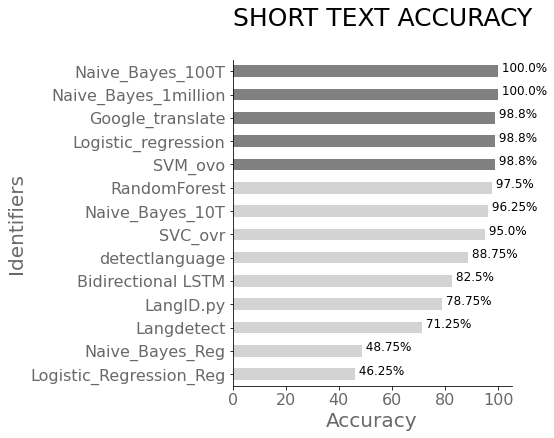

In [8]:
#fig = plt.figure(figsize = (20,16))
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,6)
colors=['lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','gray','gray','gray','gray','gray']
ax = df_comparison.plot.barh(x='Identifier', y='val',color=colors,fontsize=12)
ax.set_title('SHORT TEXT ACCURACY\n', fontsize=25,  loc='left')
y=df_comparison.val
for index, value in enumerate(y):
    plt.text(value, index, ' '+str(value)+'%', fontsize=12)
#customizing x label
ax.set_xlabel('Accuracy', fontsize=20, color='dimgrey')
#customizing y label
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
plt.yticks(fontsize=16, color='dimgrey')
plt.xticks(fontsize=16, color='dimgrey')
ax.set_ylabel('Identifiers', fontsize=20,color= 'dimgrey');
ax.get_legend().remove()
plt.show()


In [55]:
#using the accuracy information on short formal text to create a horizontal bar graph 
lst = ['Naive_Bayes_1million', 'Naive_Bayes_100T', 'Google_translate', "Bidirectional LSTM"]
  
# list of accuracies
lst2 = [98.75, 95, 96.25, 67.5]
df_comparison = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Identifier', 'val'])
df_comparison=df_comparison.sort_values('val')

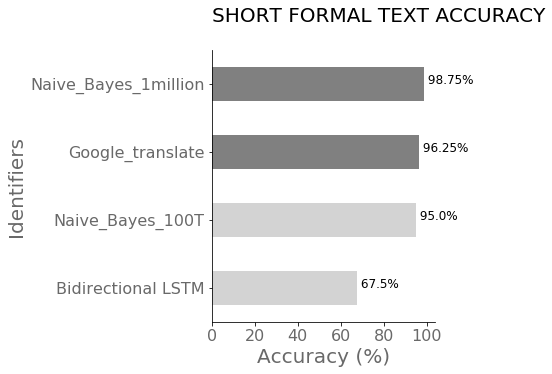

In [56]:
#fig = plt.figure(figsize = (20,16))
plt.rcParams["figure.figsize"] = (4,5)
colors=['lightgrey','lightgrey','gray','gray']
ax = df_comparison.plot.barh(x='Identifier', y='val',color=colors,fontsize=12)
ax.set_title('SHORT FORMAL TEXT ACCURACY\n', fontsize=20,  loc='left')
y=df_comparison.val
for index, value in enumerate(y):
    plt.text(value, index, ' '+str(value)+'%', fontsize=12)
#customizing x label
ax.set_xlabel('Accuracy (%)', fontsize=20, color='dimgrey')
#customizing y label
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
plt.yticks(fontsize=16, color='dimgrey')
plt.xticks(fontsize=16, color='dimgrey')
ax.set_ylabel('Identifiers', fontsize=20,color= 'dimgrey');
ax.get_legend().remove()
plt.show()


In [50]:
#using the accuracy information on full formal text to create a horizontal bar graph 
lst = ['Naive_Bayes_1million', 'Naive_Bayes_100T', 'Google_translate', "Bidirectional LSTM"]
  
# list of accuracies
lst2 = [100, 100, 100, 87.5]
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df_comparison = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Identifier', 'val'])
df_comparison=df_comparison.sort_values('val')

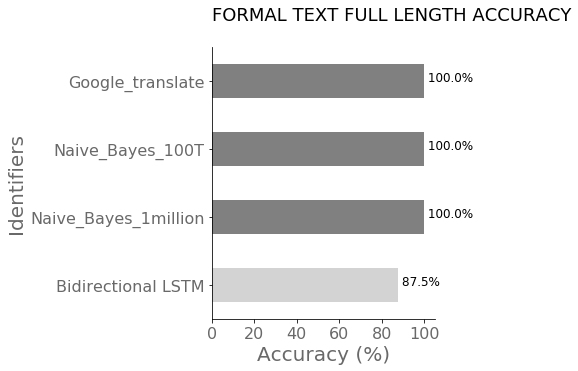

In [53]:
#fig = plt.figure(figsize = (20,16))
plt.rcParams["figure.figsize"] = (4,5)
colors=['lightgrey','gray','gray','gray']
ax = df_comparison.plot.barh(x='Identifier', y='val',color=colors,fontsize=12)
ax.set_title('FORMAL TEXT FULL LENGTH ACCURACY\n', fontsize=18,  loc='left')
y=df_comparison.val
for index, value in enumerate(y):
    plt.text(value, index, ' '+str(value)+'%', fontsize=12)
#customizing x label
ax.set_xlabel('Accuracy (%)', fontsize=20, color='dimgrey')
#customizing y label
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
plt.yticks(fontsize=16, color='dimgrey')
plt.xticks(fontsize=16, color='dimgrey')
ax.set_ylabel('Identifiers', fontsize=20,color= 'dimgrey');
ax.get_legend().remove()
plt.show()


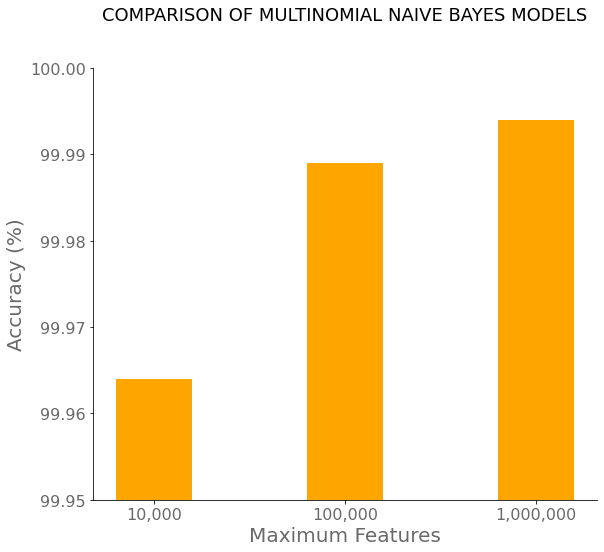

In [10]:
#comparing results of Multinomial Naive Bayes models with the different number of features
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,6))
ax = fig.add_axes([0,0,1,1])
maximum_featues = ['10,000', '100,000', '1,000,000']
accuracy = [99.964,99.989,99.994]
ax.bar(maximum_featues,accuracy, color='orange', width=0.4)
plt.ylim(99.95,100)

#customizing x label
plt.xlabel('Maximum Features', fontsize=20, color='dimgrey')
#customizing y label
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
plt.yticks(fontsize=16, color='dimgrey')
plt.xticks(fontsize=16, color='dimgrey')
plt.ylabel('Accuracy (%)', fontsize=20,color= 'dimgrey');
plt.xticks(maximum_featues)
plt.title('COMPARISON OF MULTINOMIAL NAIVE BAYES MODELS\n\n', fontsize=18)
plt.show()
plt.show()